 # PyTorch Workflow

 Let's explore an example PyTorch Workflow

 book version : https://www.learnpytorch.io/01_pytorch_workflow/

In [202]:
 what_we_are_covering = {1: "data (prepare and load)",
                         2:"build model",
                         3:"fitting the model to data (training)",
                         4:"making predictions and evaluating a model (inference)",
                         5:"saving and loading a model",
                         6:"putting it all together"}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [203]:
import torch
from torch import nn # nn contains all the pyTorch building blocks for creating neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (preparing andLoading)

Data can be almost anything in machine learning.

* Excel spreadsheet
* images of any king
* Video, Audio
* DNA
* Text

Machine learning is a game of two parts :
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.


To Showcase this, let's create some *known* data using the linear regression formula

**A linear regression has an equation of the form Y = a + bX** where b is slope of the line and a is the intercept.

We'll use a linear regression formula to make a straight line with known **parameters**

In [204]:
# Create *known* parameters
weight = 0.7  #b
bias = 0.3    # a as per (linear regression)

# Create
start = 0
end = 1
step = 0.02

# a capital X is a tensor or a vector
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X  + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [205]:
len(X),len(Y)

(50, 50)

### Splitting data into training and test sets (one of the most important cocepts in machine learning in general)

#### Three Datasets
1. training set/split (where model learns patterns from)  [60 to 80% data]
2. practice set  (tuning those patterns)        [10 to 20% data]
3. test set     (see if the model is ready for the wild ==> tests generalization) [10-20% data]
 Generalization : ability of for machine learning model to perform well on the data it has'nt seen before.

#### Let's create a training and test set with our data


In [206]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train), len(Y_train) , len(X_test), len(Y_test)

(40, 40, 10, 10)

##### Visualizing Data (matplotlib)

In [207]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data,test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions in red, if they exists
    plt.scatter(test_data,predictions,c="r",label="Predictions")

    # show legent
    plt.legend(prop={"size":14});

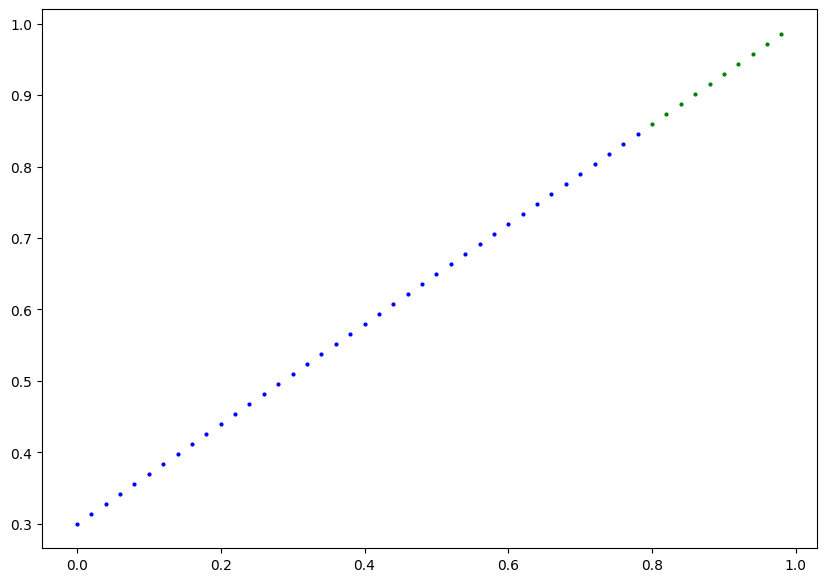

In [208]:
plot_predictions()

## 2. Build Model

Our first PyTorch model ! (linear regression model)

what our model does    
* starts with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)


How does it do so ?

Through two main algorithms   
1. Gradient descent
2. Backpropagation


In [209]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()


        # Intialize model parameters
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))



    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


### PyTorch model  building essentials

* torch.nn - contains all of the buildings  for computational graphs (neural networks)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us
* torch.nn.Module - The base class for all neural network modules, if u subclass it , you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

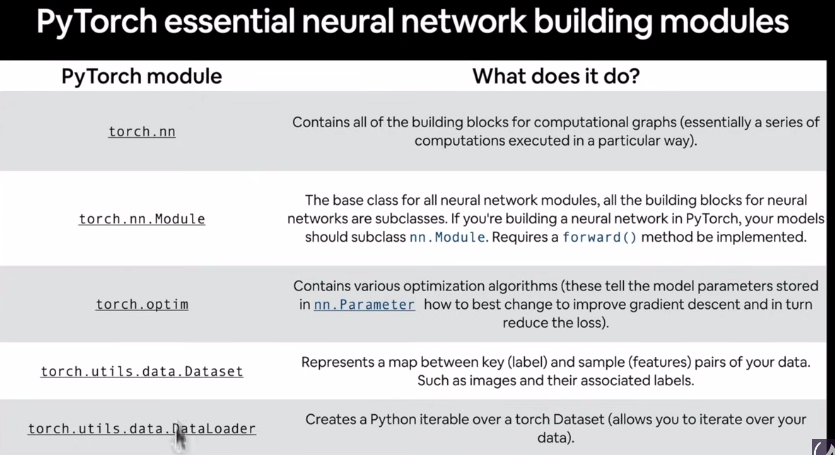


### Checking the contents of our PyTorch model

we can check our model parameters or what's inside our model using .parameters()




In [210]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [211]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predicitons using `torch.inference_mode()`

To check our model's predictive power, let's se how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's goingin to run it through the forward() medhod:


In [212]:
# Make predictions with model
with torch.inference_mode():  ## inference mode disables gradient tracking (pytorch keeps tracks of less data i.e faster predictions)
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [213]:
# # we can make predictions without inference mode
# y_preds = model_0(X_test)
# y_preds   # This slower

# # Make it a habbit to use inference_mode

In [214]:
Y_test # value we are trying to predict

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

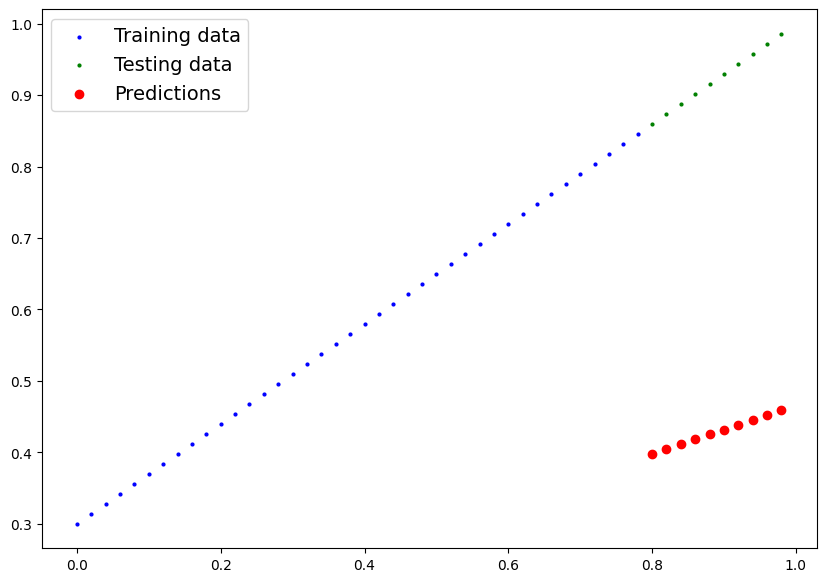

In [215]:
plot_predictions(predictions=y_preds)  # Not even close to ideal model

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representation of the data


**One way to measure how poor or how wrong your model's predictions are is to use a loss function**

Note : Loss functions may also be called cost functions or criterion in different areas.


Things we need to train :

* ** Loss function**: A function to measure how wrong your model's predictions are to the ideal ouput, the lesser is better
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g weight  & biases) to improve the loss function
function: https://pytorch.org/docs/stable/optim.html

      Inside the optimizer you will often set two parameters:
      * params : the model parameters you will like to optimize
      * lr(learning rate) : that specifies how big/small optimizeer changes the parameter




SGD optimizer : https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [216]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [217]:
# Set up a loss function
loss_fn = nn.L1Loss()  # LL1 Gives MAE - Mean Absolute Error (there are other loss functions as per application)

# setup an optimizer (torch.optim is a package that implements various optimization algorithms)
# Here we will be using SGD (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most important hyperparameter you can set

# Note : the smaller the learning rate (lr), the smaller the change in parameter


##### Q. which loss function and optimizer should i use ?
##### A: this will be problem specific. For example for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will be suffice
#####     But for a classification problem like whether a photo is a cat or a dog , you will likely to use a loss functuon `nn.BCELoss()` binary cross entropy loss

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a trainig loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions to make predictions on data -also called forward progation)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through through the network to calculate the gradients of each of the parameters of our model with respect to the loss **backpropagation**
5. Optimizer setup - use the optimizer to adjust our model's parameter to try and improve the loss (**gradient descent**)


In [218]:
torch.manual_seed(42)

# An epoch is one loop through the data ... (this is a hyper parameter because we set it ourself)
epochs = 1000

# tracking differet values (for future improvements)
epochs_count = []
loss_values = []
test_loss_values = []

# 0. Loop throught the data
for epoch in range(epochs):
  # set the model to training mode. (there are two modes and eval mode)
  model_0.train() # train mode in pyTorch  , it sets all parameters that requires gradient to true

  # 1.. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,Y_train)
  print(f"LossL {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad() # zeroes the gradients of the optimizer (they accumulate by default)

  # 4. Perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  # 5. progress/step the optimizer (perform gradient descent)
  optimizer.step()


  ### Testing
  model_0.eval() # (turns off different settings in the model not needing for testing/evaluation)

  with torch.inference_mode(): #turns off gradience tracking and other things (making things faster)
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,Y_test)

  if(epoch % 10 == 0):
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Losss : {loss} |Test loss : {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


LossL 0.31288138031959534
Epoch: 0 | Losss : 0.31288138031959534 |Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
LossL 0.3013603389263153
LossL 0.28983935713768005
LossL 0.2783183455467224
LossL 0.26679736375808716
LossL 0.2552763521671295
LossL 0.24375534057617188
LossL 0.23223432898521423
LossL 0.22071333229541779
LossL 0.20919232070446014
LossL 0.1976713240146637
Epoch: 10 | Losss : 0.1976713240146637 |Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
LossL 0.18615034222602844
LossL 0.1746293306350708
LossL 0.16310831904411316
LossL 0.1515873372554779
LossL 0.14006635546684265
LossL 0.1285453587770462
LossL 0.11702437698841095
LossL 0.1060912236571312
LossL 0.09681284427642822
LossL 0.08908725529909134
Epoch: 20 | Losss : 0.08908725529909134 |Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
LossL 0.08227583020925522
L

In [219]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00

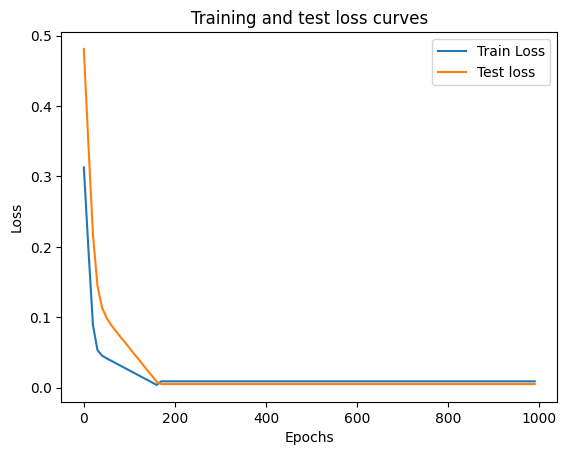

In [220]:
import numpy as np

# converting loss values to numpy (current they are tensors) in order to plot them

# Plot the loss curves
plt.plot(epochs_count,np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [221]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

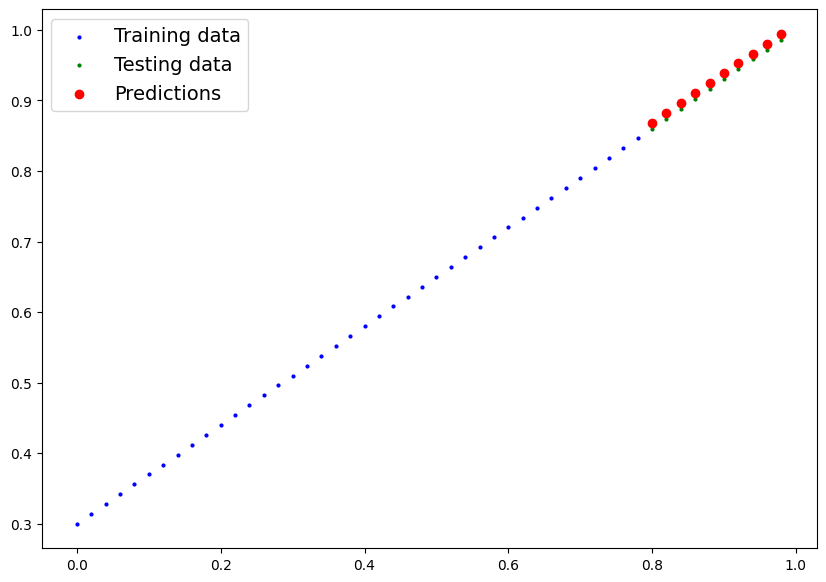

In [222]:
plot_predictions(predictions=y_preds_new)

# PyTorch Optimization loop Song

It's Train Time !
do the forward pass,
calculate the loss,
optimizer zero grad
lossss backward!

Optimizer step step step

let's test now!
with torch no grad:
do the forward pass,
calculate the loss,
watch it go down down down !

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1.`torch.save()` - allows you to save a PyTorch object in PyThon's pickle format

2.`torch.load()` - allows you to load a saved pyTorch object

3.`torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [223]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

## Now you can download the model and share it or upload it to drive
## NOTE : saving model on collab is not permanent as it gets deleted when instance is disconnected

Saving model to : models/01_pytorch_workflow_model_0.pth


In [224]:
!ls -l models # Getting models

total 4
-rw-r--r-- 1 root root 1680 Jan 11 04:06 01_pytorch_workflow_model_0.pth


## LOading a PyTorch Model

Since, we saved our model's  `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [225]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [226]:
# To load in a saved state_dict we have to instantiaste a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [227]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [228]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [229]:
# Make some models preds with old model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [230]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds # true if both models are same

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together

#### Let's go back through the steps above and see it all at one place

In [231]:
# Import pyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pyTorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code

This means if we've got acess to a GPU, our code will use it (for faster computing)
if no GPU is available, the code will run by CPU on default

In [232]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


In [233]:
!nvidia-smi

Thu Jan 11 04:06:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              35W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 6.1 Data

In [263]:
# Create some data using the linear regression formula y = weight * X   + bias
weight = 0.9
bias = 0.2

# Create range values
start = 0
end = 1

step = 0.02

# Create X  and Y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2180],
         [0.2360],
         [0.2540],
         [0.2720],
         [0.2900],
         [0.3080],
         [0.3260],
         [0.3440],
         [0.3620]]))

In [264]:
# Split data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [265]:
# Mat plot lib function for visuals
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data,test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions in red, if they exists
    plt.scatter(test_data,predictions,c="r",label="Predictions")

    # show legent
    plt.legend(prop={"size":14});

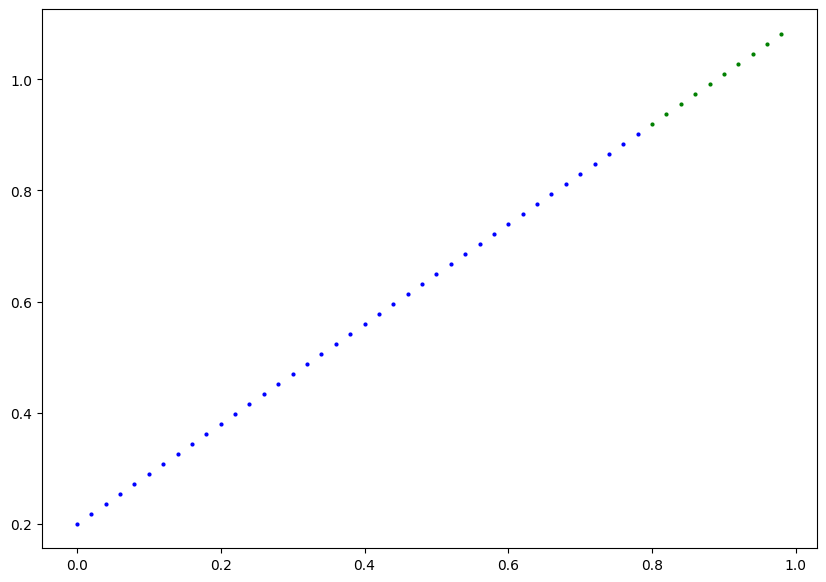

In [266]:
# Plotting the data
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a pyTorch Linear model

In [267]:
# Create a linear model by subclasssing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model parameters / also called linear layer/transform
    self.linear_layer = nn.Linear(in_features=1,  # input size 1
                                  out_features=1) # output size 1

  def forward(self,x: torch.Tensor) -> torch.Tensor : # x should be torch tensor and it shoudl return torch tensor
      return self.linear_layer(x) # performs linear regression by default



# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()




(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [268]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [269]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [270]:
# Set up loss function
loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)




In [271]:
# Let's write a training loop
torch.manual_seed(42)

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2, calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

    # Print out what's happening

    if epoch % 10 == 0 :
      print(f"Epoch : {epoch} | Loss : {loss} | test_loss : {test_loss}")

Epoch : 0 | Loss : 0.5771779417991638 | test_loss : 0.4959762692451477
Epoch : 10 | Loss : 0.4619680345058441 | test_loss : 0.36126643419265747
Epoch : 20 | Loss : 0.3467581868171692 | test_loss : 0.22655658423900604
Epoch : 30 | Loss : 0.23154833912849426 | test_loss : 0.09184672683477402
Epoch : 40 | Loss : 0.11633846908807755 | test_loss : 0.04286307841539383
Epoch : 50 | Loss : 0.06952286511659622 | test_loss : 0.11123485863208771
Epoch : 60 | Loss : 0.06158292293548584 | test_loss : 0.1282694786787033
Epoch : 70 | Loss : 0.05754905566573143 | test_loss : 0.12829315662384033
Epoch : 80 | Loss : 0.05402094125747681 | test_loss : 0.12414190918207169
Epoch : 90 | Loss : 0.050549186766147614 | test_loss : 0.11724313348531723
Epoch : 100 | Loss : 0.047114234417676926 | test_loss : 0.10965748131275177
Epoch : 110 | Loss : 0.043684374541044235 | test_loss : 0.10138493031263351
Epoch : 120 | Loss : 0.04024557024240494 | test_loss : 0.09311238676309586
Epoch : 130 | Loss : 0.036812301725149

In [272]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8936]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1980], device='cuda:0'))])

In [273]:
weight, bias

(0.9, 0.2)

## 6.4 Making and evaluating predictions

In [274]:
# Turn the model into evaluation model
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.9129],
        [0.9308],
        [0.9486],
        [0.9665],
        [0.9844],
        [1.0023],
        [1.0201],
        [1.0380],
        [1.0559],
        [1.0737]], device='cuda:0')

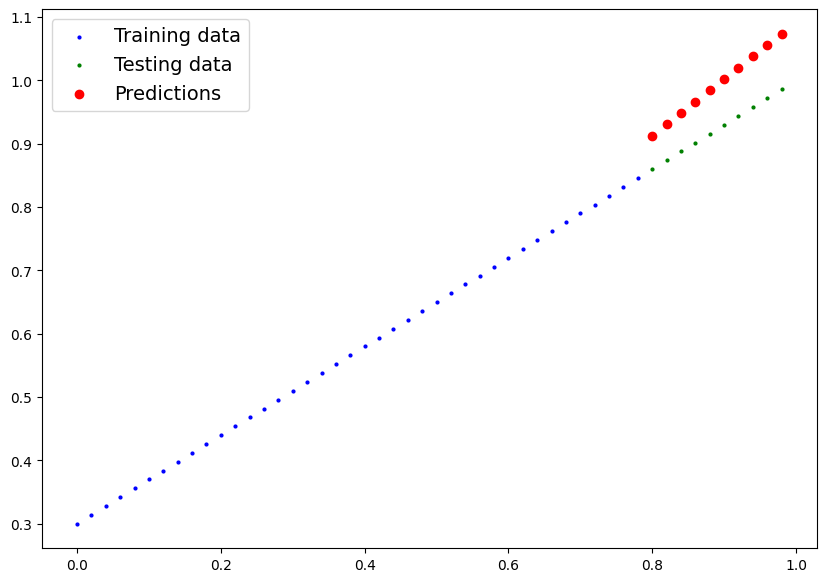

In [275]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [279]:
# Save and loading a trained model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_1.pth


In [281]:
# Load a PyTorch Model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [282]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8936]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1980], device='cuda:0'))])

In [283]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1(X_test)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')